In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------
# Geração dos dados
np.random.seed(42)

n = 2
N1 = 50
sd1 = 0.2
xc1 = np.random.normal(scale=sd1, size=(N1, n)) + np.array([2, 2])

N2 = 50
sd2 = 0.2
xc2 = np.random.normal(scale=sd2, size=(N2, n)) + np.array([4, 4])

X = np.vstack((xc1, xc2))
X_aug = np.hstack((np.ones((X.shape[0], 1)), X))  # adiciona coluna de bias
Y = np.concatenate((-np.ones(N1), np.ones(N2)))   # rótulos

In [8]:
# ------------------------------------------------------------------------
# Função para calcular margens
def calc_margin_braga(w, X_aug, Y):
    margins = X_aug @ w
    negative_margins = margins[Y == -1]
    positive_margins = margins[Y == 1]
    
    if len(negative_margins[negative_margins < 0]) > 0:
        imax_neg = np.where(margins == np.max(negative_margins[negative_margins < 0]))[0][0]
    else:
        imax_neg = np.argmax(margins[Y == -1])
        imax_neg = np.where(Y == -1)[0][imax_neg]

    if len(positive_margins[positive_margins > 0]) > 0:
        imin_pos = np.where(margins == np.min(positive_margins[positive_margins > 0]))[0][0]
    else:
        imin_pos = np.argmin(margins[Y == 1])
        imin_pos = np.where(Y == 1)[0][imin_pos]

    return imax_neg, imin_pos, margins

In [9]:
# ------------------------------------------------------------------------
# Função de treinamento do Perceptron
def treinar_perceptron(X_aug, Y, max_iter=1000):
    w = np.zeros(X_aug.shape[1])
    for epoch in range(max_iter):
        updated = False
        for i in np.random.permutation(X_aug.shape[0]):
            if Y[i] * (X_aug[i] @ w) <= 0:
                w += Y[i] * X_aug[i]
                updated = True
        if not updated:
            break
    return w

In [10]:
# ------------------------------------------------------------------------
# Loop de múltiplas execuções
n_exec = 1000
margens_simetricas = []
margens_diferenca = []
pesos_lista = []

for _ in range(n_exec):
    w = treinar_perceptron(X_aug, Y)
    imax_neg, imin_pos, margins = calc_margin_braga(w, X_aug, Y)
    margem_neg = margins[imax_neg]
    margem_pos = margins[imin_pos]
    
    margem_min_abs = min(abs(margem_neg), abs(margem_pos))
    diferenca = abs(abs(margem_neg) - abs(margem_pos))
    
    margens_simetricas.append(margem_min_abs)
    margens_diferenca.append(diferenca)
    pesos_lista.append(w)

Melhor execução (mais simétrica): 486
Margem mínima simétrica: 0.7407
Desbalanceamento: 0.0012


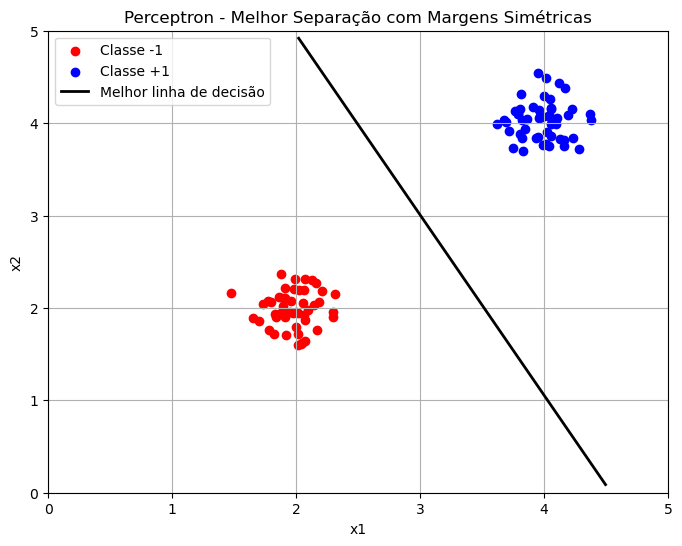

In [11]:
# ------------------------------------------------------------------------
# Plotando os resultados
""" plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(margens_simetricas, label='Menor margem (abs)')
plt.xlabel('Execução')
plt.ylabel('Margem mínima')
plt.title('Margem mínima entre as classes')
plt.grid(True)

plt.tight_layout()
plt.show() """

# ------------------------------------------------------------------------
# Melhor execução: margens mais simétricas
best_idx = np.argmin(margens_diferenca)
w_best = pesos_lista[best_idx]
print(f"Melhor execução (mais simétrica): {best_idx}")
print(f"Margem mínima simétrica: {margens_simetricas[best_idx]:.4f}")
print(f"Desbalanceamento: {margens_diferenca[best_idx]:.4f}")

# ------------------------------------------------------------------------
# Plot dos dados e da melhor linha de decisão
plt.figure(figsize=(8, 6))
plt.scatter(xc1[:, 0], xc1[:, 1], color='red', label='Classe -1')
plt.scatter(xc2[:, 0], xc2[:, 1], color='blue', label='Classe +1')

if abs(w_best[2]) > 1e-6:
    x_vals = np.linspace(0, 5, 100)
    y_vals = -(w_best[0] + w_best[1] * x_vals) / w_best[2]
    mask = (y_vals >= 0) & (y_vals <= 5)
    plt.plot(x_vals[mask], y_vals[mask], color='black', linewidth=2, label='Melhor linha de decisão')
else:
    x_intercept = -w_best[0] / w_best[1]
    if 0 <= x_intercept <= 5:
        plt.axvline(x=x_intercept, color='black', linewidth=2, label='Melhor linha de decisão')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron - Melhor Separação com Margens Simétricas')
plt.legend()
plt.grid(True)
plt.show()